In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 9.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=b8ee56e25897e03960a59f9c8547a138b2648abf5515457fc0058abbe2bfa4ba
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.master('local[4]').appName('ml').getOrCreate()

In [5]:
df = spark.read.csv('Social_Network_Ads.csv', header =True, inferSchema=True)

In [6]:
df

DataFrame[User ID: int, Gender: string, Age: double, EstimatedSalary: double, Purchased: int]

In [7]:
df.count

<bound method DataFrame.count of DataFrame[User ID: int, Gender: string, Age: double, EstimatedSalary: double, Purchased: int]>

In [8]:
df.show(5)

+--------+------+----+---------------+---------+
| User ID|Gender| Age|EstimatedSalary|Purchased|
+--------+------+----+---------------+---------+
|15624510|  Male|19.0|        19000.0|        0|
|15810944|  Male|35.0|        20000.0|        0|
|15668575|Female|26.0|        43000.0|        0|
|15603246|Female|27.0|        57000.0|        0|
|15804002|  Male|19.0|        76000.0|        0|
+--------+------+----+---------------+---------+
only showing top 5 rows



In [10]:
df.summary().show()

+-------+-----------------+------+------------------+----------------+------------------+
|summary|          User ID|Gender|               Age| EstimatedSalary|         Purchased|
+-------+-----------------+------+------------------+----------------+------------------+
|  count|              400|   400|               400|             400|               400|
|   mean|  1.56915397575E7|  null|            37.655|         69742.5|            0.3575|
| stddev|71658.32158119006|  null|10.482876597307927|34096.9602824248|0.4798639635968691|
|    min|         15566689|Female|              18.0|         15000.0|                 0|
|    25%|         15625395|  null|              29.0|         43000.0|                 0|
|    50%|         15694288|  null|              37.0|         70000.0|                 0|
|    75%|         15750335|  null|              46.0|         88000.0|                 1|
|    max|         15815236|  Male|              60.0|        150000.0|                 1|
+-------+-

In [11]:
pdf = df.toPandas()
pdf

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [13]:
df.groupby('Purchased').count().show()

+---------+-----+
|Purchased|count|
+---------+-----+
|        1|  143|
|        0|  257|
+---------+-----+



In [14]:
df.describe().show()

+-------+-----------------+------+------------------+----------------+------------------+
|summary|          User ID|Gender|               Age| EstimatedSalary|         Purchased|
+-------+-----------------+------+------------------+----------------+------------------+
|  count|              400|   400|               400|             400|               400|
|   mean|  1.56915397575E7|  null|            37.655|         69742.5|            0.3575|
| stddev|71658.32158119006|  null|10.482876597307927|34096.9602824248|0.4798639635968691|
|    min|         15566689|Female|              18.0|         15000.0|                 0|
|    max|         15815236|  Male|              60.0|        150000.0|                 1|
+-------+-----------------+------+------------------+----------------+------------------+



In [15]:
pdf.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
from pyspark.sql.functions import isnull, when, count, col

In [17]:
#number of missing values
df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+-------+------+---+---------------+---------+
|User ID|Gender|Age|EstimatedSalary|Purchased|
+-------+------+---+---------------+---------+
|      0|     0|  0|              0|        0|
+-------+------+---+---------------+---------+



In [53]:
from typing_extensions import Required
# Assemble the features
Required_features = ['Age', 'EstimatedSalary']

In [54]:
pdf[Required_features]

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [55]:
# import the vector assembler class
from pyspark.ml.feature import VectorAssembler

In [56]:
# create the object
assembler = VectorAssembler(inputCols=Required_features,outputCol='features')

In [57]:
transformed_data = assembler.transform(df)

In [58]:
transformed_data.show(5)

+--------+------+----+---------------+---------+--------------+
| User ID|Gender| Age|EstimatedSalary|Purchased|      features|
+--------+------+----+---------------+---------+--------------+
|15624510|  Male|19.0|        19000.0|        0|[19.0,19000.0]|
|15810944|  Male|35.0|        20000.0|        0|[35.0,20000.0]|
|15668575|Female|26.0|        43000.0|        0|[26.0,43000.0]|
|15603246|Female|27.0|        57000.0|        0|[27.0,57000.0]|
|15804002|  Male|19.0|        76000.0|        0|[19.0,76000.0]|
+--------+------+----+---------------+---------+--------------+
only showing top 5 rows



In [59]:
# split the data in train and test
training_data, test_data = transformed_data.randomSplit([0.75,0.25],seed =0 )

In [60]:
training_data.count()

301

In [61]:
test_data.count()

99

In [62]:
training_data.groupby('Purchased').count().show()

+---------+-----+
|Purchased|count|
+---------+-----+
|        1|  109|
|        0|  192|
+---------+-----+



In [63]:
test_data.groupby('Purchased').count().show()

+---------+-----+
|Purchased|count|
+---------+-----+
|        1|   34|
|        0|   65|
+---------+-----+



In [64]:
from pyspark.ml.classification import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(labelCol='Purchased',featuresCol='features')

In [66]:
# train the algorith
model =  dt.fit(training_data)

In [67]:
# predictions on unseen data
predictions = model.transform(test_data)

In [68]:
predictions.show(5)

+--------+------+----+---------------+---------+---------------+-------------+--------------------+----------+
| User ID|Gender| Age|EstimatedSalary|Purchased|       features|rawPrediction|         probability|prediction|
+--------+------+----+---------------+---------+---------------+-------------+--------------------+----------+
|15566689|Female|35.0|        57000.0|        0| [35.0,57000.0]|  [118.0,0.0]|           [1.0,0.0]|       0.0|
|15581198|  Male|31.0|        74000.0|        0| [31.0,74000.0]|  [118.0,0.0]|           [1.0,0.0]|       0.0|
|15581282|  Male|37.0|        74000.0|        0| [37.0,74000.0]|   [21.0,6.0]|[0.77777777777777...|       0.0|
|15584320|Female|37.0|       146000.0|        1|[37.0,146000.0]|   [0.0,10.0]|           [0.0,1.0]|       1.0|
|15584545|Female|32.0|        86000.0|        0| [32.0,86000.0]|  [118.0,0.0]|           [1.0,0.0]|       0.0|
+--------+------+----+---------------+---------+---------------+-------------+--------------------+----------+
o

In [69]:
predictions.select('prediction').toPandas()

,prediction
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
94,0.0
95,0.0
96,1.0
97,0.0


In [70]:
pred = predictions.select('prediction').toPandas()

In [71]:
actual = test_data.select('Purchased').toPandas()

In [72]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

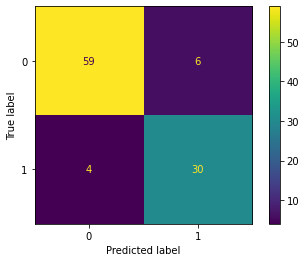

In [73]:
ConfusionMatrixDisplay.from_predictions(actual, pred)

In [74]:
accuracy_score(actual, pred)

0.898989898989899

In [75]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        65
           1       0.83      0.88      0.86        34

    accuracy                           0.90        99
   macro avg       0.88      0.90      0.89        99
weighted avg       0.90      0.90      0.90        99



In [76]:
# import the evaluation class
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [77]:
eval = MulticlassClassificationEvaluator(labelCol='Purchased',metricName='accuracy')

In [78]:
print('Accuracy: ', eval.evaluate(predictions))

Accuracy:  0.898989898989899
